# First Read of a Modtran data
===============================

- author Sylvie Dagoret-Campagne
- date January 5th 2017

This is an example showing how to open a MT output file using the pandas library and then plotting
the curves.




In [1]:
import numpy as np
# Set up matplotlib and use a nicer set of plot parameters
%config InlineBackend.rc = {}
import matplotlib
matplotlib.rc_file("templates/matplotlibrc")
import matplotlib.pyplot as plt
%matplotlib inline


/Users/dagoret-campagnesylvie/.local/lib/python2.7/site-packages/matplotlib/__init__.py:878: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
import pandas as pd
import os
import re

In [4]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Select input file

In [6]:
atmfile="mt.txt"

## Get the Header from file

In [77]:
df_header=pd.read_csv(atmfile, sep="\t",header=None,usecols=range(0,4))

In [78]:
df_header=df_header[:5]

In [79]:
df_header

,0,1,2,3
0,361976 U,S STAND,ARD,NaN
1,2.70000 1,0,0 33.6,0000 11
2,NaN,NaN,NaN,NaN
3,WL,H2O,O3,MOLEC
4,(NM),TRANS,TRANS,SCAT


## Get the Data from file

In [27]:
df = pd.read_csv(atmfile, sep="\t", header=4,usecols=range(0,4))

In [31]:
df.head()

,(NM),TRANS,TRANS.1,SCAT
0,250.0,1.0,0.0,0.0960
1,250.5,1.0,0.0,0.0981
2,251.0,1.0,0.0,0.1001
3,251.5,1.0,0.0,0.1022
4,252.0,1.0,0.0,0.1043


## Rename the columns indexes

In [34]:
df.columns = ["wl", "h2o", "o3","scat"]

In [49]:
df.head()

,wl,h2o,o3,scat
0,250.0,1.0,0.0,0.0960
1,250.5,1.0,0.0,0.0981
2,251.0,1.0,0.0,0.1001
3,251.5,1.0,0.0,0.1022
4,252.0,1.0,0.0,0.1043


## Extract the data for plotting

In [54]:
X=df["wl"]
Y1=df["h2o"]
Y2=df["o3"]
Y3=df["scat"]
Y=Y1*Y2*Y3

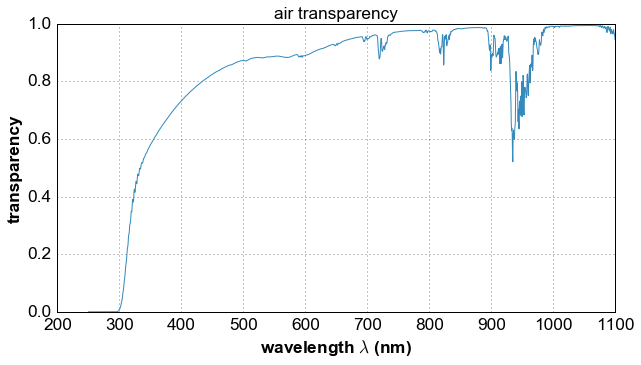

In [82]:
plt.plot(X,Y)
plt.title("air transparency")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("transparency")

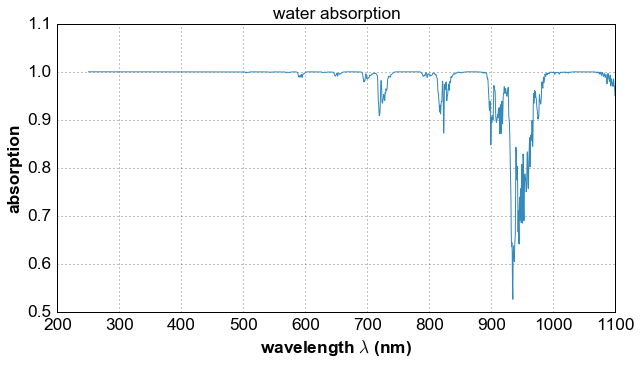

In [81]:
plt.plot(X,Y1)
plt.title("water absorption")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("absorption")

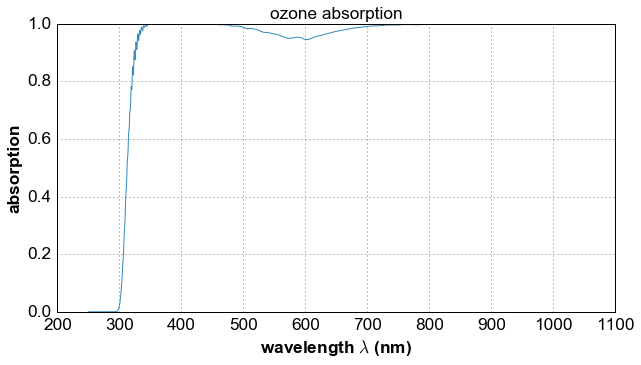

In [83]:
plt.plot(X,Y2)
plt.title("ozone absorption")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("absorption")

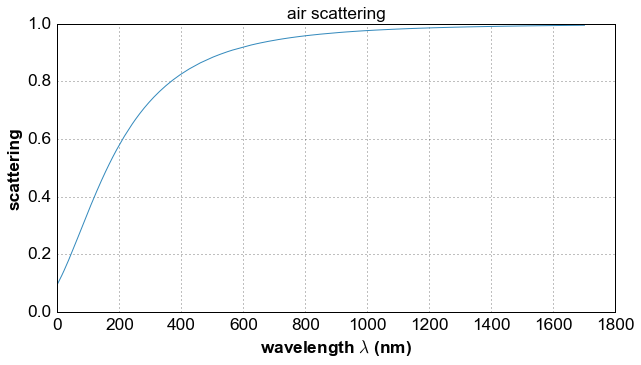

In [84]:
plt.plot(Y3)
plt.title("air scattering")
plt.xlabel("wavelength $\lambda$ (nm)")
plt.ylabel("scattering")